<a href="https://colab.research.google.com/github/Maleesha-Shavindi/core-machine-learning-models/blob/main/Regression_model_to_predict_the_salary_of_a_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("w2_position_salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


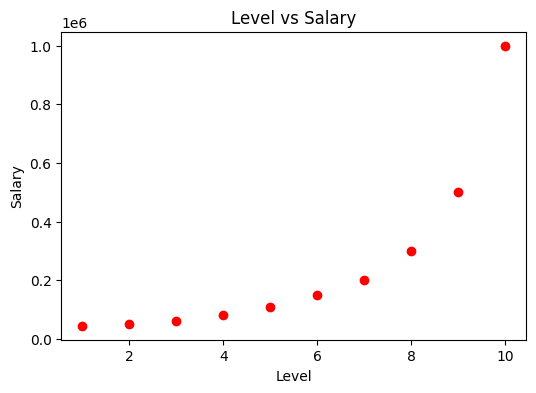

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(df["Level"], df["Salary"], 'ro')
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")

plt.show()

In [5]:
xmean = np.mean(df["Level"])
ymean = np.mean(df["Salary"])

In [6]:

df['xycov']= (df['Level']-xmean)*(df['Salary']-ymean)
df['xvar']= (df['Level']-xmean)**2

In [7]:

slope=df['xycov'].sum() / df['xvar'].sum()
intercept=ymean - (slope*xmean)
print(f'slope={slope}')
print(f'intercept={intercept}')

slope=80878.78787878787
intercept=-195333.3333333333


In [8]:
intercept + slope*7

np.float64(370818.1818181818)

In [10]:
Salary_pred = intercept + slope*df["Level"]

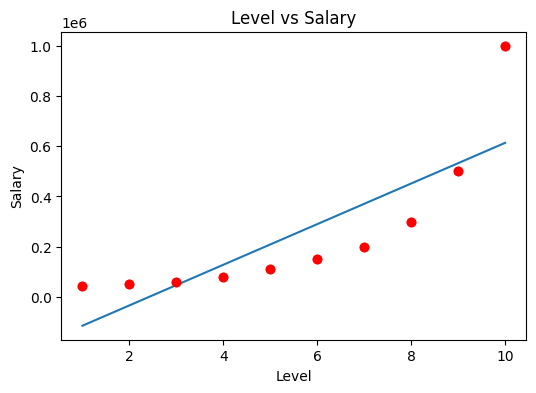

In [12]:

plt.figure(figsize=(6,4))
plt.plot(df['Level'], Salary_pred)        #regression line
plt.plot(df["Level"], df["Salary"], 'ro') #scatter plot showing actual data
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.plot(df["Level"], df["Salary"], 'ro') #scatter plot showing actual data
plt.ylabel("Salary")
plt.show()

In [16]:
import pandas as pd
import numpy as np

# 1. Load the dataset
dataset = pd.read_csv('w2_position_salaries.csv')

# 2. Define X (Input: Level) and y (Output: Salary)
# We use .values to get the arrays, and reshape X to be a 2D array
X = dataset.iloc[:, 1:2].values  # Takes the "Level" column
y = dataset.iloc[:, 2].values    # Takes the "Salary" column

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 1. Transform the input data to Polynomial Features
poly_regr = PolynomialFeatures(degree=2)
X_poly2 = poly_regr.fit_transform(X) # Using the entire 'Level' column

# 2. Train the model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly2, y) # Using the entire 'Salary' column

# 3. Predict using the same training data
y_pred2 = lin_reg_2.predict(X_poly2)

# 4. Compute the R2 Score
r2_degree2 = r2_score(y, y_pred2)
print(f"R2 Score for Degree 2: {r2_degree2}")

R2 Score for Degree 2: 0.9162082221443942


In [18]:
degrees = [2, 3, 4]

for d in degrees:
    # Transform
    poly_feat = PolynomialFeatures(degree=d)
    X_poly = poly_feat.fit_transform(X)

    # Fit
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict and Score
    y_pred = model.predict(X_poly)
    score = r2_score(y, y_pred)

    print(f"Degree {d} R2 Score: {score}")

Degree 2 R2 Score: 0.9162082221443942
Degree 3 R2 Score: 0.9812097727913366
Degree 4 R2 Score: 0.9973922891706614


In [19]:
# 1. Train the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 2. Get the R2 value directly
r2_simple = lin_reg.score(X, y)
print(f"R2 Score for Simple Linear Regression: {r2_simple}")

R2 Score for Simple Linear Regression: 0.6690412331929895
